In [1]:
!conda install --yes scikit-learn
!conda install --yes matplotlib
!conda install --yes seaborn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.10
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.10
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.10
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [2]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn import linear_model

import matplotlib.pyplot as plt
import datetime
import seaborn
import pandas

In [3]:
df = pandas.read_csv('../data/datasource.csv').set_index('Ocorrencia')

### Checking out duplicate values

Assuming that the 'Ocorrencia' is a unique code for the transaction itself. Let's check if there's any duplicated occurrence.

```python
len(df.index.unique())
```
If the dataset doesn't present any duplicated values, this piece of code should return, as output, 150.000 data entries. Nevertheless it returned only 64.958 values - meaning that this dataset presents around 85.042 duplicated data entries.

```python
len(df) - len(df.index.unique())
```

The duplicated values will be kept on analysis and training in modeling step. Due the nature of this dataset, this duplicate values could have been naturally generated - meaning that one occurrence could occur more than once - or, due the lack of available training material, some transactions could have been artificially generated.

--------------------------------

In [4]:
# Checking the number of unique values.
len(df.index.unique())

64958

In [5]:
# Checking the number of duplicated entries.
len(df) - len(df.index.unique())

85042

### Exploratory Analysis

Section aimed on checking the data distribution and data behaviour.

- N.A. values?
- Outliers?
- Min.
- Max.
- Mean.
- Stdev.

-------------------------

In [6]:
df.describe()

,PP1,PP2,PP3,PP4,PP5,PP6,PP7,PP8,PP9,PP10,...,PP21,PP22,PP23,PP24,PP25,PP26,PP27,PP28,Sacado,Fraude
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.058999,-0.000790,-0.192183,-0.037416,0.061588,-0.025715,0.026695,-0.004257,0.028148,-0.003959,...,0.009957,0.027398,0.007275,-0.002739,-0.035211,-0.001127,-0.000535,-0.001028,-88.602261,0.001580
std,1.894453,1.623712,1.406053,1.397615,1.341265,1.310820,1.194923,1.205874,1.106154,1.075456,...,0.739429,0.707714,0.622620,0.606964,0.506130,0.483787,0.397662,0.307684,247.302373,0.039718
min,-2.454930,-22.057729,-9.382558,-16.875344,-32.911462,-21.307738,-31.527244,-16.635979,-15.594995,-23.745136,...,-27.202839,-10.503090,-19.002942,-4.022866,-7.519589,-3.220178,-12.152401,-22.620072,-19656.530000,0.000000
25%,-1.243456,-0.802149,-1.138473,-0.812624,-0.526469,-0.424574,-0.527260,-0.340863,-0.565387,-0.452162,...,-0.165038,-0.466423,-0.128298,-0.431560,-0.369398,-0.247606,-0.090965,-0.078861,-77.662500,0.000000
50%,0.042647,-0.082193,-0.359076,-0.039549,0.124219,0.245177,-0.013129,-0.037083,0.095975,0.096236,...,0.033794,0.014600,0.020008,-0.049357,-0.071030,0.057265,-0.004792,-0.016759,-22.040000,0.000000
75%,0.952018,0.588600,0.555060,0.816575,0.751890,0.734024,0.564334,0.193112,0.678488,0.515473,...,0.225362,0.540801,0.164620,0.348762,0.274183,0.331361,0.068544,0.048427,-5.410000,0.000000
max,36.802320,63.344698,33.680984,5.683171,31.356750,21.929312,43.557242,73.216718,13.434066,24.588262,...,34.830382,10.933144,44.807735,2.824849,10.295397,2.604551,22.565679,11.710896,-0.000000,1.000000


### Describe Analysis Result

This section summarizes the initial analysis on this dataset.

The command below allows to summarize each variable and retrieve the main statistical characteristics. 

```python
df.describe()
```

The first thing to be noticed is at 'Sacado' variable - the amount of money withdrawn. 


| Statistical Measurement | Value        |
| :---------------------: | :----------: |
| Mean                    | -88.602261	 |
| Standard Deviation      | 247.302373	 |
| Min                     | -19656.53    |
| Max                     | -0.00        |

How can be observed on this chart. The behaviour of 'Sacado' variable is pretty weird. First of all, this variable presents the highest standard deviation of all variables (247.30).

```python
df.describe().loc['std'].sort_values(ascending=False).head()
```

The mean, min and max values are pretty strange as well - with all of them being negative or null values. How this values could be negative/null values if this variable it was meant to represent the total withdrawn value of the transaction?

__Possible errors:__

- Acquistion errors?
- Parsing issues?

Other variables seems to behave pretty well (well distributed along the mean value - almost a normal curve) - even didn't knowing what they represent (the max values are high? the min values are low?).

_obs: Even with the lower deviation. On training, a simple normalization will be made on this dataset._

-------------

In [7]:
df.describe().loc['std'].sort_values(ascending=False).head()

Sacado    247.302373
PP1         1.894453
PP2         1.623712
PP3         1.406053
PP4         1.397615
Name: std, dtype: float64

In [88]:
df[df.Sacado >= 0]

,PP1,PP2,PP3,PP4,PP5,PP6,PP7,PP8,PP9,PP10,...,PP21,PP22,PP23,PP24,PP25,PP26,PP27,PP28,Sacado,Fraude
Ocorrencia,,,,,,,,,,,,,,,,,,,,,
-44477.0,-1.313605,0.829722,-1.021403,0.744870,1.205293,-0.474090,1.346662,-0.313100,0.343039,-0.636555,...,-0.359877,-1.140092,0.118763,0.255286,-0.402635,0.012719,-0.064429,-0.006987,-0.0,0
-44599.0,0.984284,-0.117687,-1.252511,-0.698290,-2.807570,-4.183633,0.713125,-1.323068,0.441396,0.177385,...,0.181102,0.720237,0.158528,-0.972914,-0.576616,0.151814,0.023672,0.009284,-0.0,0
-44763.0,-1.112887,-0.072755,-1.484284,-2.921132,0.892824,-0.369635,0.661314,-0.248757,-0.578535,-0.407350,...,-0.011709,-0.358025,0.118988,-0.419876,-0.590765,-0.215559,-0.043610,-0.025280,-0.0,0
-44818.0,1.503509,-0.650070,-1.979962,-3.199407,0.183885,-1.864190,1.367814,-0.320220,0.505109,-0.502571,...,-1.031552,-0.808919,0.299368,0.206468,0.547728,-0.419715,-0.168761,0.095962,-0.0,0
-44890.0,0.700064,-0.436402,-1.074464,2.477506,0.047570,1.623677,-0.634653,0.298907,-0.929959,1.417118,...,-0.096927,-0.247317,0.167330,-0.422878,0.258257,0.294845,0.154354,-0.171619,-0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-132454.0,2.061483,-1.641567,1.192412,1.722827,-2.902106,-4.638144,0.356431,4.635032,-2.164227,-1.964215,...,-3.635734,1.272928,-0.418075,-0.624839,0.538000,1.045620,2.046863,0.729384,-0.0,0
-132892.0,1.197804,0.787945,-0.150943,0.826385,-2.293986,2.391732,-0.302980,0.227648,-0.056401,0.848129,...,-0.116091,0.025749,-0.210352,0.018723,0.485217,0.303273,-0.098812,-0.233373,-0.0,0
-132944.0,0.190846,-0.555578,-1.115820,0.604743,0.171172,0.313610,-0.152727,-0.045064,-0.511116,0.421987,...,-0.449453,-1.345258,0.190516,-0.112088,0.344460,0.266088,0.165140,-0.045965,-0.0,0


### Some plots

On this section are plots for visualizing the dispersion of some 'random' variables.

----------------

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2770d5f8>,
      dtype=object)

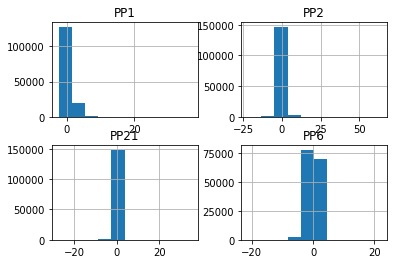

In [80]:
df[['PP1', 'PP2', 'PP6', 'PP21']].hist()

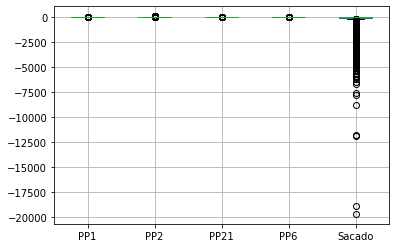

In [82]:
# As it can be observed. The Sacado variable has a lot of outliers - removing and analysing it alone 
# (for not disturbing the scale)
df[['PP1', 'PP2', 'PP21', 'PP6', 'Sacado']].boxplot()

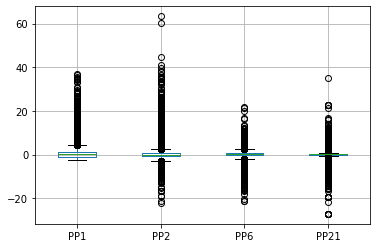

In [81]:
# There are outliers on it - predicted it on histogram.
df[['PP1', 'PP2', 'PP6', 'PP21']].boxplot()

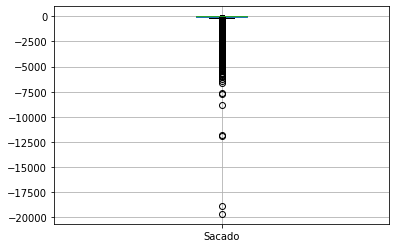

In [11]:
df[['Sacado']].boxplot()

### Seeking for N.A. values

This dataset does not present N.A./Blank values.

----------------------------

In [12]:
sum(df.index.isna())

0

In [13]:
dict_na = {
    'columns': list(df.columns),
    'na': []
}

for i in range(len(df.columns)):
    dict_na.get('na').append(sum(df[df.columns[i]].isna()))

pandas.DataFrame(dict_na).set_index('columns')

,na
columns,
PP1,0
PP2,0
PP3,0
PP4,0
PP5,0
PP6,0
PP7,0
PP8,0
PP9,0


### Does this dataset is non-balanced?

This section aims on checking if the dataset is non-balanced - are more frauds than non-frauds? Vice-Versa?

Table below assumes that the y variable - Fraude - has only 2 unique values - presented in table.

```python
df.Fraude.unique()
```

| Value | Meaning   | Total    | Percentage |
| :---: | :-------: | :------: | :--------: |
| 0     | Non Fraud | 149.763  | 99,842 %   |
| 1     | Fraud     | 237      | 0,0158 %   |

As can be observed on the table above. It's been assumed that 0 represents a non-fraudulent transaction and 1 represents a fraudulent transaction. This dataset is pretty unbalanced - with less than 1 % being fraudulent transactions (237 data entries). This scenario, on model training steps would be a problem - the model probably will be overfitted in fraudulents occurrences. To prevent it, it must be added some new - artificially generated or naturally acquired - fraudulents data entries.

----------------------------------------

In [14]:
# Checking how many unique entries this variable presents.
df.Fraude.unique()

array([0, 1])

In [15]:
# Checking how many data entries are non-fraud or 0
print(len(df[df['Fraude'] == 0]))

# Checking the percentage of non-fraud transactions
print(len(df[df['Fraude'] == 0])/len(df.Fraude))

149763
0.99842


In [16]:
# Checking how many data entries are fraud or 1
len(df[df['Fraude'] == 1])

# Checking the percentage of fraud transactions
print(len(df[df['Fraude'] == 1])/len(df.Fraude))

0.00158


### Dimensionality Reduction

This section aims on reduct the dimensionality of this dataset.

__It can be used:__

- linear regression, correlation and statistically relevance;
- PCA;

_obs: despite the robustness of PCA, some articles presents issues on its performance - losing to simpler techniques._

-----------------------

In [17]:
occurrence = pandas.Series(df.index)

x = pandas.DataFrame(df[df.columns[1:-1]])
y = pandas.DataFrame(df[df.columns[-1]])

In [18]:
# Multiple Linear Regression
lm = linear_model.LinearRegression().fit(x, y)

attr_reduction = SelectFromModel(lm, prefit=True)

df_pca = pandas.DataFrame(attr_reduction.transform(x))

### Building Predictors

Three models will be implemented - if none of them supply the needs, new models could be choosen - and compared. Not only the assertiveness rate will be considered. The most problematic issue are False Negatives occurences - when the occurrence is Fraudulent however the model classified it as a Non-fraudulent occurence - if this happens the model will "lose" some points. False positives could be sent to a human validation - not so problematic as False Negatives.

__Models__:
- Linear Regression;
- Support Vector Machines;
- Random Forest.

_obs: Random forest classifier, when compared with other classifiers, presented 1 advantage point and 1 disavantage point - it wasn't able to converge in polynomial time (when compared to Linear Regression and SVM's times - much bigger time to converge), however it presented the most precise classifiers between all 3 - With lesser False Negatives._

_obs: Due the results. A grid search with SVM and Random Forest will not be needed_

On this scenario, even with time complexity being an issue - when pipelined in production - the random forest will be chosen into "production" step.

_obs: My concerns come to reality. All 3 models classifies pretty well non fraudulent transactions. However - due the lack of data - all 3 - at some point and in some level - presented an overfitting in classifying Fraudulent transactions - a further study will be made with Random Forest - the model with the most precise behaviour._

------------------------

In [19]:
def data_separation(df, proportion=0.2):
    """
    Data separation method.
    """
    return train_test_split(df, test_size=proportion)

In [20]:
def time_screening(dt):
    """
    Fitting time performance calculator.
    """
    print(datetime.datetime.now() - dt)

In [21]:
results = {
    'linear_model': {
        'train': [],
        'test': [],
        'validation': []
    },
    'svm': {
        'train': [],
        'test': [],
        'validation': []
    },
    'random_forest': {
        'train': [],
        'test': [],
        'validation': []
    }
}

In [22]:
train, test = data_separation(df)
test, validation = data_separation(test, 0.4)

In [23]:
# Splitting into train - x and y
x_train = pandas.DataFrame(train[train.columns[0:-1]])
y_train = pandas.DataFrame(train[train.columns[-1]])

# Splitting into test - x and y
x_test = pandas.DataFrame(test[test.columns[0:-1]])
y_test = pandas.DataFrame(test[test.columns[-1]])

# Splitting into validation - x and y
x_validation = pandas.DataFrame(validation[validation.columns[0:-1]])
y_validation = pandas.DataFrame(validation[validation.columns[-1]])

In [24]:
# Multiple Linear Regression
begin = datetime.datetime.now()

lm = linear_model.LinearRegression().fit(x_train, y_train)

time_screening(begin)

y_train['Predicted'] = lm.predict(x_train)
y_train['Predicted'] = y_train['Predicted'].astype(int)

y_test['Predicted'] = lm.predict(x_test)
y_test['Predicted'] = y_test['Predicted'].astype(int)

y_validation['Validation'] = lm.predict(x_validation)
y_validation['Validation'] = y_validation['Validation'].astype(int)

0:00:00.337315


In [25]:
results.get('linear_model')['train'] = len(y_train[y_train['Fraude'] == y_train['Predicted']])/len(y_train)
results.get('linear_model')['test'] = len(y_test[y_test['Fraude'] == y_test['Predicted']])/len(y_test)
results.get('linear_model')['validation'] = len(y_validation[y_validation['Fraude'] == y_validation['Validation']])/len(y_validation)

In [26]:
pandas.DataFrame(confusion_matrix(y_train[['Fraude']], y_train[['Predicted']]), 
                 ['Non Fraud', 'Fraud'], ['Non Fraud', 'Fraud'])

,Non Fraud,Fraud
Non Fraud,119800,1
Fraud,168,31


In [27]:
pandas.DataFrame(confusion_matrix(y_test[['Fraude']], y_test[['Predicted']]), 
                 ['Non Fraud', 'Fraud'], ['Non Fraud', 'Fraud'])

,Non Fraud,Fraud
Non Fraud,17977,0
Fraud,19,4


In [28]:
pandas.DataFrame(confusion_matrix(y_validation[['Fraude']], y_validation[['Validation']]), 
                 ['Non Fraud', 'Fraud'], ['Non Fraud', 'Fraud'])

,Non Fraud,Fraud
Non Fraud,11985,0
Fraud,12,3


In [29]:
# Linear Support Vector Machine
begin = datetime.datetime.now()

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False, max_iter=10000).fit(x_train, y_train.Fraude.values)

time_screening(begin)

y_train['Predicted'] = lsvc.predict(x_train)
y_train['Predicted'] = y_train['Predicted'].astype(int)

y_test['Predicted'] = lsvc.predict(x_test)
y_test['Predicted'] = y_test['Predicted'].astype(int)

y_validation['Validation'] = lsvc.predict(x_validation)
y_validation['Validation'] = y_validation['Validation'].astype(int)

0:00:03.284036


In [30]:
results.get('svm')['train'] = len(y_train[y_train['Fraude'] == y_train['Predicted']])/len(y_train)
results.get('svm')['test'] = len(y_test[y_test['Fraude'] == y_test['Predicted']])/len(y_test)
results.get('svm')['validation'] = len(y_validation[y_validation['Fraude'] == y_validation['Validation']])/len(y_validation)

In [31]:
pandas.DataFrame(confusion_matrix(y_train[['Fraude']], y_train[['Predicted']]), 
                 ['Non Fraud', 'Fraud'], ['Non Fraud', 'Fraud'])

,Non Fraud,Fraud
Non Fraud,119788,13
Fraud,54,145


In [32]:
pandas.DataFrame(confusion_matrix(y_test[['Fraude']], y_test[['Predicted']]), 
                 ['Non Fraud', 'Fraud'], ['Non Fraud', 'Fraud'])

,Non Fraud,Fraud
Non Fraud,17974,3
Fraud,8,15


In [33]:
pandas.DataFrame(confusion_matrix(y_validation[['Fraude']], y_validation[['Validation']]), 
                 ['Non Fraud', 'Fraud'], ['Non Fraud', 'Fraud'])

,Non Fraud,Fraud
Non Fraud,11982,3
Fraud,2,13


In [34]:
# Random Forest
begin = datetime.datetime.now()

r_forest = RandomForestClassifier(n_estimators=90).fit(x_train, y_train.Fraude.values)

time_screening(begin)

y_train['Predicted'] = r_forest.predict(x_train)
y_train['Predicted'] = y_train['Predicted'].astype(int)

y_test['Predicted'] = r_forest.predict(x_test)
y_test['Predicted'] = y_test['Predicted'].astype(int)

y_validation['Validation'] = r_forest.predict(x_validation)
y_validation['Validation'] = y_validation['Validation'].astype(int)

0:01:50.102289


In [35]:
results.get('random_forest')['train'] = len(y_train[y_train['Fraude'] == y_train['Predicted']])/len(y_train)
results.get('random_forest')['test'] = len(y_test[y_test['Fraude'] == y_test['Predicted']])/len(y_test)
results.get('random_forest')['validation'] = len(y_validation[y_validation['Fraude'] == y_validation['Validation']])/len(y_validation)

In [36]:
pandas.DataFrame(confusion_matrix(y_train[['Fraude']], y_train[['Predicted']]), 
                 ['Non Fraud', 'Fraud'], ['Non Fraud', 'Fraud'])

,Non Fraud,Fraud
Non Fraud,119801,0
Fraud,0,199


In [37]:
pandas.DataFrame(confusion_matrix(y_test[['Fraude']], y_test[['Predicted']]), 
                 ['Non Fraud', 'Fraud'], ['Non Fraud', 'Fraud'])

,Non Fraud,Fraud
Non Fraud,17976,1
Fraud,7,16


In [38]:
pandas.DataFrame(confusion_matrix(y_validation[['Fraude']], y_validation[['Validation']]), 
                 ['Non Fraud', 'Fraud'], ['Non Fraud', 'Fraud'])

,Non Fraud,Fraud
Non Fraud,11982,3
Fraud,2,13


In [39]:
pandas.DataFrame(results)

,linear_model,svm,random_forest
train,0.998592,0.999442,1.000000
test,0.998944,0.999389,0.999556
validation,0.999000,0.999583,0.999583


### Using selected model in "production" environment

- Normalize data
- Split data
- fit and predict model

-----------------------------------------------------

In [40]:
# Data Normalization
scaler = preprocessing.MinMaxScaler().fit(df_pca)
df_pca_norm = pandas.DataFrame(scaler.transform(df_pca))

df_pca_norm['Occurrence'] = occurrence
df_pca_norm.set_index('Occurrence', drop=True, inplace=True)

In [41]:
# Data separation
df_pca_norm['Fraude'] = y

train, test = data_separation(df_pca_norm)
test, validation = data_separation(test, 0.4)

In [42]:
# Splitting into train - x and y
x_train = pandas.DataFrame(train[train.columns[0:-1]])
y_train = pandas.DataFrame(train[train.columns[-1]])

# Splitting into test - x and y
x_test = pandas.DataFrame(test[test.columns[0:-1]])
y_test = pandas.DataFrame(test[test.columns[-1]])

# Splitting into validation - x and y
x_validation = pandas.DataFrame(validation[validation.columns[0:-1]])
y_validation = pandas.DataFrame(validation[validation.columns[-1]])

In [43]:
# Random Forest
begin = datetime.datetime.now()

r_forest = RandomForestClassifier(n_estimators=90).fit(x_train, y_train.Fraude.values)

time_screening(begin)

y_train['Predicted'] = r_forest.predict(x_train)
y_train['Predicted'] = y_train['Predicted'].astype(int)

y_test['Predicted'] = r_forest.predict(x_test)
y_test['Predicted'] = y_test['Predicted'].astype(int)

y_validation['Validation'] = r_forest.predict(x_validation)
y_validation['Validation'] = y_validation['Validation'].astype(int)

0:00:48.581284


In [44]:
print(len(y_train[y_train['Fraude'] == y_train['Predicted']])/len(y_train))
print(len(y_test[y_test['Fraude'] == y_test['Predicted']])/len(y_test))
print(len(y_validation[y_validation['Fraude'] == y_validation['Validation']])/len(y_validation))

1.0
0.9994444444444445
0.9993333333333333


In [45]:
pandas.DataFrame(confusion_matrix(y_train[['Fraude']], y_train[['Predicted']]), 
                 ['Non Fraud', 'Fraud'], ['Non Fraud', 'Fraud'])

,Non Fraud,Fraud
Non Fraud,119815,0
Fraud,0,185


In [46]:
pandas.DataFrame(confusion_matrix(y_test[['Fraude']], y_test[['Predicted']]), 
                 ['Non Fraud', 'Fraud'], ['Non Fraud', 'Fraud'])

,Non Fraud,Fraud
Non Fraud,17968,2
Fraud,8,22


In [47]:
pandas.DataFrame(confusion_matrix(y_validation[['Fraude']], y_validation[['Validation']]), 
                 ['Non Fraud', 'Fraud'], ['Non Fraud', 'Fraud'])

,Non Fraud,Fraud
Non Fraud,11977,1
Fraud,7,15


In [48]:
# Checking if there's overfitting on classifying Frauds - due the low quantity of data entries
overfitting = x_validation
overfitting['Fraude'] = y_validation['Fraude']

aux = x_test
aux['Fraude'] = y_test['Fraude']

overfitting = overfitting.append(aux)
overfitting = overfitting[overfitting['Fraude'] == 1]
del(aux)

In [49]:
overfitting['Predicted'] = r_forest.predict(overfitting.drop(columns=['Fraude']))

In [52]:
# Decay of assertiveness rate
print(len(overfitting[overfitting['Fraude'] == overfitting['Predicted']])/len(overfitting))

0.7115384615384616


In [50]:
pandas.DataFrame(confusion_matrix(overfitting[['Fraude']], overfitting[['Predicted']]), 
                 ['Non Fraud', 'Fraud'], ['Non Fraud', 'Fraud'])

,Non Fraud,Fraud
Non Fraud,0,0
Fraud,15,37


### Summarizing

Section aimed on summarizing the methodology of this study and concluding it.

#### Checking duplicated values

Assuming that the 'Ocorrencia' is a unique code for the transaction itself. Let's check if there's any duplicated occurrence.

```python
len(df.index.unique())
```
If the dataset doesn't present any duplicated values, this piece of code should return, as output, 150.000 data entries. Nevertheless it returned only 64.958 values - meaning that this dataset presents around 85.042 duplicated data entries.

```python
len(df) - len(df.index.unique())
```

The duplicated values will be kept on analysis and training in modeling step. Due the nature of this dataset, this duplicate values could have been naturally generated - meaning that one occurrence could occur more than once - or, due the lack of available training material, some transactions could have been artificially generated.

----------------------------

#### Exploratory Analysis

Section aimed on checking the data distribution and data behaviour.

- N.A. values?
- Outliers?
- Min.
- Max.
- Mean.
- Stdev.

-------------------------

#### Describe Exploratory Analysis Result

This section summarizes the initial analysis on this dataset.

The command below allows to summarize each variable and retrieve the main statistical characteristics. 

```python
df.describe()
```

The first thing to be noticed is at 'Sacado' variable - the amount of money withdrawn. 


| Statistical Measurement | Value        |
| :---------------------: | :----------: |
| Mean                    | -88.602261	 |
| Standard Deviation      | 247.302373	 |
| Min                     | -19656.53    |
| Max                     | -0.00        |

How can be observed on this chart. The behaviour of 'Sacado' variable is pretty weird. First of all, this variable presents the highest standard deviation of all variables (247.30).

```python
df.describe().loc['std'].sort_values(ascending=False).head()
```

The mean, min and max values are pretty strange as well - with all of them being negative or null values. How this values could be negative/null values if this variable it was meant to represent the total withdrawn value of the transaction?

__Possible errors:__

- Acquistion errors?
- Parsing issues?

Other variables seems to behave pretty well (well distributed along the mean value - almost a normal curve) - even didn't knowing what they represent (the max values are high? the min values are low?).

_obs: Even with the lower deviation. On training, a simple normalization will be made on this dataset._

-------------

#### Does this dataset is non-balanced?

This section aims on checking if the dataset is non-balanced - are more frauds than non-frauds? Vice-Versa?

Table below assumes that the y variable - Fraude - has only 2 unique values - presented in table.

```python
df.Fraude.unique()
```

| Value | Meaning   | Total    | Percentage |
| :---: | :-------: | :------: | :--------: |
| 0     | Non Fraud | 149.763  | 0,9984     |
| 1     | Fraud     | 237      | 0,0015     |

As can be observed on the table above. It's been assumed that 0 represents a non-fraudulent transaction and 1 represents a fraudulent transaction. This dataset is pretty unbalanced - with less than 1 % being fraudulent transactions (237 data entries). This scenario, on model training steps would be a problem - the model probably will be overfitted in fraudulents occurrences. To prevent it, it must be added some new - artificially generated or naturally acquired - fraudulents data entries.

----------------------------------------

#### Dimensionality Reduction

This section aims on reduct the dimensionality of this dataset.

__It can be used:__

- linear regression, correlation and statistically relevance;
- PCA;

_obs: despite the robustness of PCA, some articles presents issues on its performance - losing to simpler techniques._

-----------------------

#### Building Predictors

Three models will be implemented - if none of them supply the needs, new models could be choosen - and compared. Not only the assertiveness rate will be considered. The most problematic issue are False Negatives occurences - when the occurrence is Fraudulent however the model classified it as a Non-fraudulent occurence - if this happens the model will "lose" some points. False positives could be sent to a human validation - not so problematic as False Negatives.

__Models__:
- Linear Regression;
- Support Vector Machines;
- Random Forest.

_obs: Random forest classifier, when compared with other classifiers, presented 1 advantage point and 1 disavantage point - it wasn't able to converge in polynomial time (when compared to Linear Regression and SVM's times - much bigger time to converge), however it presented the most precise classifiers between all 3 - With lesser False Negatives._

_obs: Due the results. A grid search with SVM and Random Forest will not be needed_

On this scenario, even with time complexity being an issue - when pipelined in production - the random forest will be chosen into "production" step.

_obs: My concerns come to reality. All 3 models classifies pretty well non fraudulent transactions. However - due the lack of data - all 3 - at some point and in some level - presented an overfitting in classifying Fraudulent transactions - a further study will be made with Random Forest - the model with the most precise behaviour._

------------------------

#### Using selected  model - Random Forest - in "production" environment

__Steps:__
- Normalize data;
- Split data;
- fit and predict model.

Due the normalization and - mainly - the dim reduction, the Random Forest's time performance has increased. During the development time the fitting time was about 0:01:50.102289. In _"production"_ time this time has decresead to 0:00:48.581284 - a time reduction of 0:01:01.521005.

```python
str(datetime.datetime.strptime('0:01:50.102289', '%H:%M:%S.%f') -
    datetime.datetime.strptime('0:00:48.581284', '%H:%M:%S.%f'))
```

The model precision is presented in table below:


| Environment      | Train  | Test   | Validation | Overfitting |
| :--------------: | :----: | :----: | :--------: | :---------: |
| Dev              | 1,0000 | 0,9995 | 0,9995     | ----------- |
| Prod             | 1,0000 | 0,9994 | 0,9993     | 0,7115      |

As could be observed. During the _"dev"_ time - without normalization and dimension reduction - the model achieved good results. The normalization - minmax normalization - and dimension reduction - from 29 variables to only 9 - achieved overwhelming results in time complexity - as mentioned before. Nevertheless, as mentioned, a further study on this model performance was required - __does the lack of fraudlent data overfits the model?__. 
To test it the test and validation dataframes were merged and only fraudulent data was selected - resulting in a dataframe with 52 data entries (didn't include the train fraudulent data) - and passed to model predictor. The model should've predicted all as Frauds, however, the most problematic case appeared - Frauds classified as Non Frauds (False Negatives).<br>
In summary, a good non-fraud classifier was built - with little cases of False Positives (Non Frauds classified as Fraud) - however, as mentioned before, the most problematic case - False Negatives - occur more frequently. To correct it, appart from the selected model - since simpler until the most robust ones (Linear Regression, Bayes, Adaboost, Tree Classifiers, SVM's or Neural Nets) - it needed to add new fraudulent data entries on this dataset - artificially generated or not.

-----------------------------------------------------